# Applying a decision tree for regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Reading data

In [2]:
DATA = pd.read_csv("DataFrame_Reducido.csv", index_col="Unnamed: 0")
DATA

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.20
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.90,0.50,0.72,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.00,0.52,0.68,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,0.02,0.81,0.42,0.50,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.00,0.42,0.74,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.00,0.28,0.76,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.00,0.31,0.47,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,0.09,1.00,0.44,0.64,0.19


## Creating test and train sets for model fitting

In [3]:
X = DATA.loc[:, DATA.columns[:-2]]
Y = DATA.loc[:, DATA.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=21)
X_train.size, X_test.size

(15678, 5239)

## Defining the optimum number samples per splits and leafs

In [13]:
Results_Nums_SplitLeaf = []
MaxR2 = 0.0

for numSplit in range(1, 11):
    for numLeaf in range(1, 11):
        DT_Regressor = DecisionTreeRegressor(min_samples_split=numSplit, min_samples_leaf=numLeaf)
        DT_Regressor.fit(X_train, Y_train)
        Y_hat = DT_Regressor.predict(X_test)

        MS2_E = mean_squared_error(Y_test, Y_hat)
        MA_E = mean_absolute_error(Y_test, Y_hat)
        R2_Score = r2_score(Y_test, Y_hat)
                
        if  MaxR2 < R2_Score:
            MaxR2 = R2_Score
            MinSampleSplit = numSplit
            MinSampleLeaf = numLeaf

print(f"{MinSampleLeaf=}")
print(f"{MinSampleSplit=}")
print(f"{R2_Score=}")

MinSampleLeaf=8
MinSampleSplit=2
R2_Score=0.5130476794475237


## Using optimal number of samples for leafs and splits

In [10]:
DT_Regressor = DecisionTreeRegressor(min_samples_split=MinSampleSplit, min_samples_leaf=MinSampleLeaf)
DT_Regressor.fit(X_train, Y_train)
Y_hat = DT_Regressor.predict(X_test)

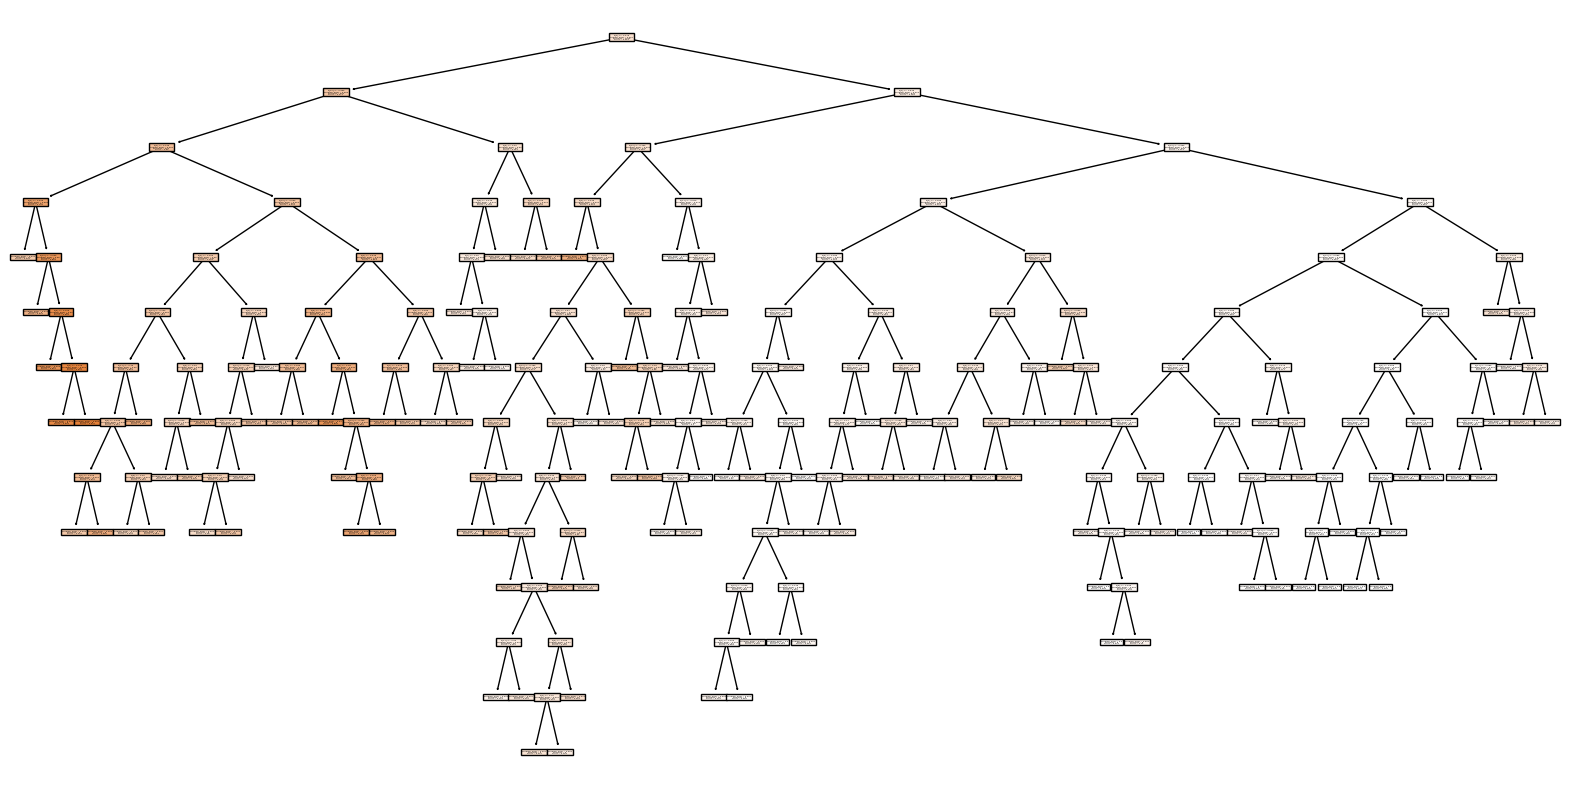

In [11]:
FiguraTree, SubPlot = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

plot_tree(DT_Regressor, filled=True, ax=SubPlot)
plt.show()

In [7]:
Y_hat = DT_Regressor.predict(X_test)

## Obtaining scores for K-Means model

In [8]:
MS2_E = mean_squared_error(Y_test, Y_hat)
MA_E = mean_absolute_error(Y_test, Y_hat)
R2 = r2_score(Y_test, Y_hat)

print(f"{MS2_E=} ")
print(f"{MA_E=} ")
print(f"{R2=} ")

MS2_E=0.027553214196145547 
MA_E=0.1159783898896802 
R2=0.5137544732013772 
